In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns

from matplotlib import rcParams
from sklearn.linear_model import LinearRegression

from collections import Counter

sns.set(rc={'figure.figsize': (11.7, 8.27)})
rcParams['figure.figsize'] = 11.7,8.27
plt.rcParams['font.family'] = 'AppleGothic'

In [97]:
xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

data_startcol = 7
ogDatasObj = {}
for col in xlsx:
    if col >= data_startcol: # startcol 7
        ogDatasObj[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]

ogDatas = pd.DataFrame(ogDatasObj)
ogDatas = ogDatas.fillna(0)
ogDatas = ogDatas.reset_index()
del ogDatas['index']

pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 100)

ogDatas

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,아파트1-103-502,아파트1-103-1602,아파트1-103-301,아파트1-103-1502,아파트1-103-202,아파트1-102-903,아파트1-102-603,아파트1-102-203,아파트1-102-704,아파트1-102-703,아파트1-102-403,아파트1-102-303,아파트1-101-604,아파트1-101-1602,아파트1-101-1002,아파트1-101-1202,아파트1-101-1604,아파트1-101-402,아파트1-101-303,아파트1-101-502,아파트1-101-1403,아파트1-101-904,아파트1-101-1502,아파트1-101-1102,아파트1-101-901,아파트1-101-704,아파트1-101-504,아파트1-102-104,아파트1-102-301,아파트1-102-1501,아파트1-102-1602,아파트1-102-1002,아파트1-102-401,아파트1-102-802,아파트1-102-801,아파트1-103-505,아파트1-103-1805,아파트1-103-1306,아파트1-103-1806,아파트1-103-803,...,아파트4-103-609,아파트4-103-707,아파트4-103-101,아파트4-102-803,아파트4-101-1501,아파트4-103-404,아파트4-103-909,아파트4-101-1203,아파트4-103-806,아파트4-103-1410,아파트4-103-402,아파트4-103-703,아파트4-103-106,아파트4-103-910,아파트4-102-402,아파트4-103-907,아파트4-103-1406,아파트4-103-1006,아파트4-103-608,아파트4-103-403,아파트4-105-1102,아파트4-103-804,아파트4-103-103,아파트4-103-706,아파트4-104-1001,아파트4-105-103,아파트4-102-401,아파트4-103-1104,아파트4-103-906,아파트4-103-606,아파트4-103-1307,아파트4-103-410,아파트4-103-1309,아파트4-102-102,아파트4-103-508,아파트4-105-1104,아파트4-102-1402,아파트4-103-407,아파트4-103-1206,아파트4-103-108,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
0,0.085,0.016,0.052,0.003,0.032,0.074,0.053,0.096,0.105,0.042,0.149,0.039,0.054,0.132,0.091,0.169,0.051,0.118,0.060,0.047,0.047,0.053,0.046,0.104,0.079,0.092,0.043,0.069,0.139,0.026,0.146,0.092,0.025,0.127,0.045,0.042,0.113,0.207,0.030,0.171,0.045,0.064,0.045,0.277,0.186,0.142,0.132,0.034,0.088,0.041,...,0.041,0.137,0.114,0.046,0.098,0.058,0.068,0.040,0.063,0.048,0.168,0.053,0.099,0.075,0.080,0.158,0.024,0.153,0.056,0.037,0.091,0.069,0.128,0.092,0.072,0.069,0.034,0.166,0.086,0.113,0.184,0.175,0.096,0.054,0.080,0.084,0.119,0.088,0.117,0.161,0.182,0.044,0.051,0.057,0.126,0.094,0.065,0.116,0.093,0.147
1,0.086,0.049,0.053,0.002,0.022,0.014,0.048,0.090,0.108,0.022,0.119,0.023,0.075,0.142,0.063,0.183,0.045,0.164,0.065,0.066,0.043,0.056,0.045,0.130,0.081,0.102,0.042,0.083,0.176,0.046,0.113,0.088,0.026,0.116,0.066,0.050,0.139,0.188,0.031,0.165,0.032,0.068,0.052,0.244,0.209,0.205,0.161,0.039,0.094,0.036,...,0.036,0.083,0.124,0.055,0.115,0.068,0.072,0.032,0.085,0.111,0.173,0.050,0.103,0.068,0.076,0.360,0.031,0.132,0.038,0.037,0.097,0.075,0.123,0.072,0.053,0.059,0.023,0.135,0.143,0.112,0.101,0.163,0.154,0.078,0.036,0.076,0.092,0.042,0.121,0.179,0.117,0.060,0.036,0.055,0.116,0.089,0.083,0.113,0.105,0.130
2,0.085,0.013,0.073,0.002,0.016,0.051,0.029,0.033,0.097,0.046,0.116,0.018,0.071,0.096,0.159,0.122,0.043,0.141,0.097,0.064,0.055,0.054,0.051,0.119,0.109,0.097,0.056,0.086,0.126,0.036,0.113,0.079,0.027,0.170,0.072,0.044,0.163,0.201,0.053,0.163,0.041,0.071,0.046,0.256,0.173,0.199,0.122,0.028,0.084,0.026,...,0.045,0.081,0.115,0.063,0.070,0.053,0.078,0.036,0.083,0.111,0.084,0.053,0.084,0.071,0.087,0.471,0.024,0.079,0.047,0.036,0.078,0.059,0.137,0.084,0.083,0.056,0.036,0.106,0.160,0.108,0.184,0.162,0.124,0.135,0.053,0.073,0.108,0.056,0.100,0.224,0.147,0.053,0.075,0.032,0.131,0.055,0.084,0.153,0.119,0.104
3,0.085,0.043,0.067,0.002,0.015,0.015,0.031,0.092,0.048,0.067,0.102,0.031,0.128,0.082,0.104,0.141,0.031,0.103,0.075,0.082,0.046,0.016,0.046,0.078,0.070,0.073,0.051,0.085,0.098,0.048,0.145,0.078,0.021,0.142,0.062,0.034,0.149,0.194,0.038,0.065,0.043,0.070,0.043,0.274,0.047,0.108,0.162,0.034,0.069,0.038,...,0.039,0.086,0.068,0.035,0.064,0.061,0.065,0.022,0.066,0.087,0.080,0.047,0.079,0.066,0.029,0.187,0.030,0.059,0.055,0.035,0.080,0.074,0.090,0.066,0.071,0.062,0.034,0.114,0.121,0.108,0.051,0.170,0.068,0.072,0.074,0.078,0.101,0.080,0.084,0.178,0.152,0.047,0.064,0.022,0.104,0.057,0.087,0.149,0.102,0.093
4,0.084,0.033,0.051,0.003,0.022,0.052,0.052,0.030,0.041,0.045,0.102,0.032,0.122,0.069,0.089,0.103,0.011,0.094,0.084,0.053,0.047,0.022,0.048,0.040,0.077,0.089,0.041,0.092,0.062,0.045,0.109,0.109,0.033,0.084,0.069,0.035,0.225,0.199,0.078,

In [99]:
ogDatas.replace('-', 0, inplace=True)
uids = ogDatas.columns

In [85]:
startDate = datetime(2018,5,1)
endDate = datetime(2019,5,1)
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                   datetime_range(startDate, endDate, timedelta(days = 1))]
# 아파트1-104-1206
searchKeyword = '아파트1-104-1206'
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

,date,year,month,day
0,2018-05-01,2018,05,01
1,2018-05-02,2018,05,02
2,2018-05-03,2018,05,03
3,2018-05-04,2018,05,04
4,2018-05-05,2018,05,05
...,...,...,...,...
360,2019-04-26,2019,04,26
361,2019-04-27,2019,04,27
362,2019-04-28,2019,04,28
363,2019-04-29,2019,04,29


4 계절 나누기
---

In [86]:
SEASONS = {
    "봄" : ["03", "04", "05"],
    "여름" : ["06", "07", "08"],
    "가을" : ["09", "10", "11"],
    "겨울" : ["12", "01", "02"]
}

SEASONSARR = ['봄','여름','가을','겨울']

'''
 0 : 봄
 1 : 여름
 2 : 가을
 3 : 겨울
'''

datas = [
    tsDatas[(tsDatas['month'].isin(SEASONS[season]))].copy()
    for season in ["봄", "여름", "가을", "겨울"]
]

아파트1-104-1206 Start
아파트1-104-303 Start
아파트1-104-1307 Start
아파트1-104-1208 Start
아파트1-104-408 Start
아파트1-104-203 Start
아파트1-103-1402 Start
아파트1-103-402 Start
아파트1-103-1201 Start
아파트1-103-801 Start
아파트1-103-502 Start
아파트1-103-1602 Start
아파트1-103-301 Start
아파트1-103-1502 Start
아파트1-103-202 Start
아파트1-102-903 Start
아파트1-102-603 Start
아파트1-102-203 Start
아파트1-102-704 Start
아파트1-102-703 Start
아파트1-102-403 Start
아파트1-102-303 Start
아파트1-101-604 Start
아파트1-101-1602 Start
아파트1-101-1002 Start
아파트1-101-1202 Start
아파트1-101-1604 Start
아파트1-101-402 Start
아파트1-101-303 Start
아파트1-101-502 Start


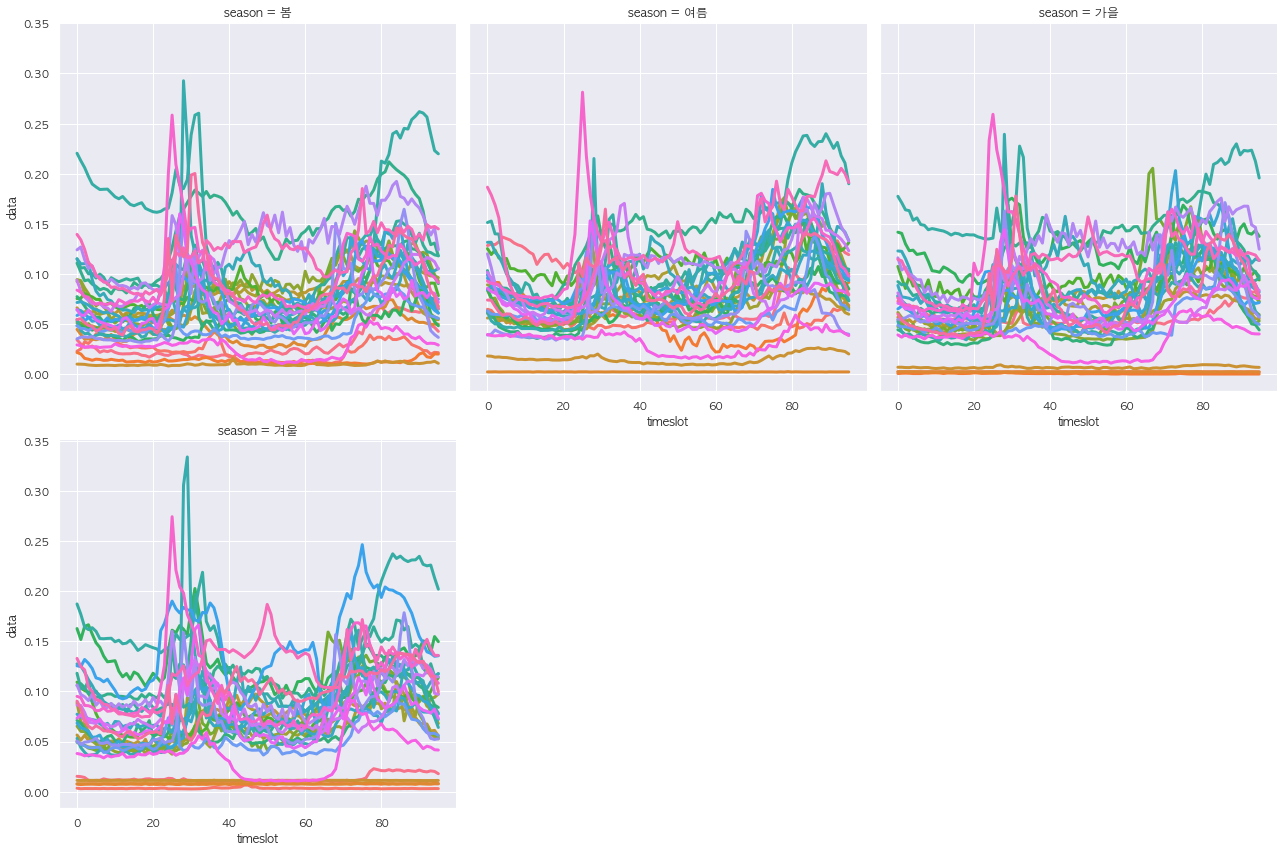

In [108]:
count = 0;
max_count = 30;

for uid in uids:
    if count >= max_count:
        break;
    startDate = datetime(2018,5,1)
    endDate = datetime(2019,5,1)
    def datetime_range(start, end, delta):
        current = start
        while current < end:
            yield current
            current += delta
    dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                       datetime_range(startDate, endDate, timedelta(days = 1))]
    # 아파트1-104-1206
    print(f'{uid} Start')
    searchKeyword = uid
    tsDatasObj = {}
    startIdx = 0;
    endIdx = 96;
    for date in dateIndexArr:
        tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
        startIdx = endIdx
        endIdx = endIdx + 96

    tsDatas = pd.DataFrame(tsDatasObj)
    tsDatas = tsDatas.T
    tsDatas = tsDatas.reset_index()
    tsDatas.rename(columns={'index':'date'}, inplace=True)
    tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
    tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
    tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
    tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
    tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

    SEASONS = {
        "봄" : ["03", "04", "05"],
        "여름" : ["06", "07", "08"],
        "가을" : ["09", "10", "11"],
        "겨울" : ["12", "01", "02"]
    }

    SEASONSARR = ['봄','여름','가을','겨울']

    '''
     0 : 봄
     1 : 여름
     2 : 가을
     3 : 겨울
    '''

    datas = [
        tsDatas[(tsDatas['month'].isin(SEASONS[season]))].copy()
        for season in ["봄", "여름", "가을", "겨울"]
    ]

    for i in range(0,4):
        dpp = datas[i][datas[i].columns.difference(['date', 'year', 'month', 'day'])].copy()
        dpp = dpp

        # Scaler 선택
        # STD, MIN, MAX, ROBUST
        selScaler = "ROBUST"

        scaler = StandardScaler()
        if selScaler == "STD":
            scaler = StandardScaler()
        elif selScaler == "MIN":
            scaler = MinMaxScaler()
        elif selScaler == "MAX":
            scaler = MaxAbsScaler()
        elif selScaler == "ROBUST":
            scaler = RobustScaler()

        dpp = pd.DataFrame(scaler.fit_transform(dpp))

        dpp.index = datas[i]['date']
        dpp

        pca = PCA(n_components=2)

        pca.fit(dpp)
        dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

        dr.index = datas[i]['date']
        dr

        '''
        def elbow(X):
            sse = []
            for i in range(1, 11):
                km = KMeans(n_clusters=i, init='k-means++', random_state=0)
                km.fit(X)
                sse.append(km.inertia_)

            plt.plot(range(1, 11), sse, marker = 'o')
            plt.show()

        elbow(dr)
        '''

        K = 3

        points = dr.values
        kmeans = KMeans(n_clusters=K).fit(points)
        centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])

        clusterNum = [i for i in range(K)]
        centers['cluster'] = [i for i in range(len(centers))]
        centers['type'] = [f'cluster' for dt in clusterNum]
        centers

        kmeans.labels_

        clustering = dr.copy()
        clustering['cluster'] = kmeans.labels_
        clustering['type'] = ['data' for i in range(len(clustering['x']))]

        result = pd.concat([clustering, centers], axis = 0)

        result

        '''
        sns.scatterplot(x='x', y="y", 
                        hue="cluster", 
                        style="type",
                        palette="muted",
                        s=400,
                        data=result)
        '''
        tsCheck = datas[i][datas[i].columns.difference(['year', 'month', 'day'])].copy()
        tsCheck.reset_index(inplace=True)
        del tsCheck['index']
        tsCheck = tsCheck.set_index('date')
        tsCheck['cluster'] = clustering['cluster']
        tsCheck.reset_index(inplace=True)
        tsCheck.set_index(['cluster', 'date'], inplace=True)
        tsCheck = tsCheck.T
        tsCheck
        '''
        sns.lineplot(data=tsCheck)
        '''

        processingData = [];
        for d in tsCheck:
            for idx,t in enumerate(tsCheck[d]):
                processingData.append({
                    "date": d[1],
                    "timeslot": idx,
                    "cluster": f"cluster-{d[0]}",
                    "data": t
                })
        processingData = pd.DataFrame(processingData)
        processingData

        '''
        sns.lineplot(data=processingData,
                    x="timeslot",
                    y="data",
                    units="date",
                    hue="cluster",
                    estimator=None,
                    lw=0.5)
        '''

        best = pd.DataFrame(processingData.groupby('cluster').size().sort_values(ascending=False)).reset_index()['cluster'][0]
#        print(f'best is {best}')
        cluster = processingData[processingData['cluster'] == best].groupby('timeslot').mean().reset_index()
        cluster['uid'] = searchKeyword
        cluster['season'] = SEASONSARR[i]
        cluster

        clusters = pd.concat([clusters, cluster], axis = 0)
        
    count+=1
        
clusterMap = sns.FacetGrid(clusters, col="season",col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data", "uid", estimator=None, lw=3)

<AxesSubplot:>

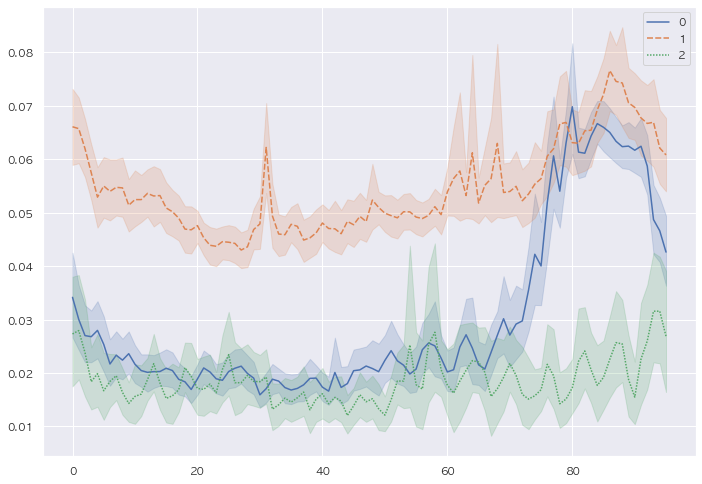

In [54]:
tsCheck = datas[0][datas[0].columns.difference(['year', 'month', 'day'])].copy()
tsCheck.reset_index(inplace=True)
del tsCheck['index']
tsCheck = tsCheck.set_index('date')
tsCheck['cluster'] = clustering['cluster']
tsCheck.reset_index(inplace=True)
tsCheck.set_index(['cluster', 'date'], inplace=True)
tsCheck = tsCheck.T
tsCheck
sns.lineplot(data=tsCheck)

<AxesSubplot:xlabel='timeslot', ylabel='data'>

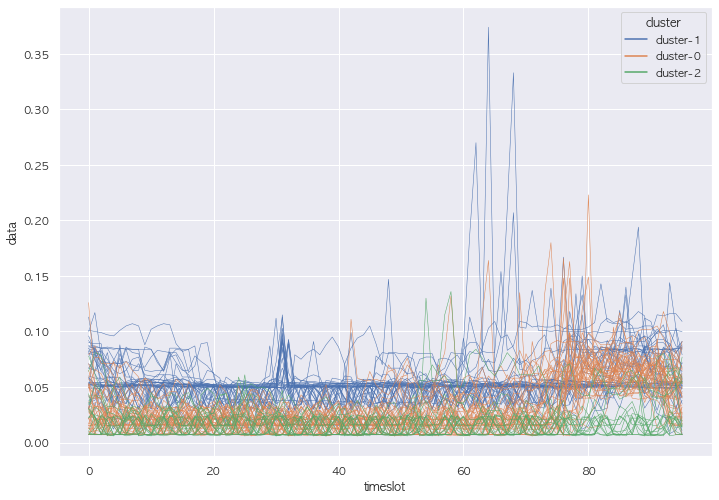

In [55]:
'''
Data Structure
{
    date: datetime,
    timeslot: integer,
    cluster: string,
    data: float
}
'''
processingData = [];
for d in tsCheck:
    for idx,t in enumerate(tsCheck[d]):
        processingData.append({
            "date": d[1],
            "timeslot": idx,
            "cluster": f"cluster-{d[0]}",
            "data": t
        })
processingData = pd.DataFrame(processingData)
processingData

sns.lineplot(data=processingData,
            x="timeslot",
            y="data",
            units="date",
            hue="cluster",
            estimator=None,
            lw=0.5)

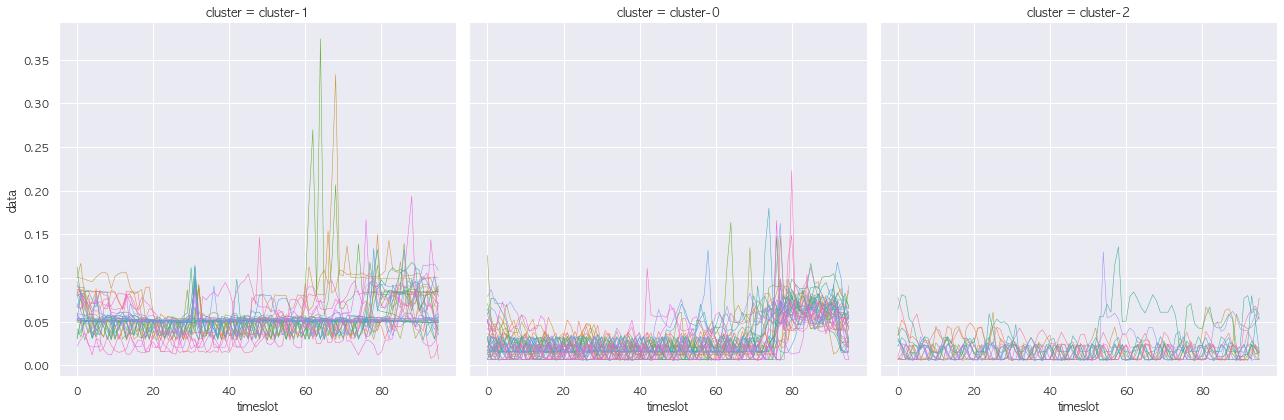

In [56]:
clusterMap = sns.FacetGrid(processingData, col="cluster",col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data", "date",estimator=None, lw=0.5)

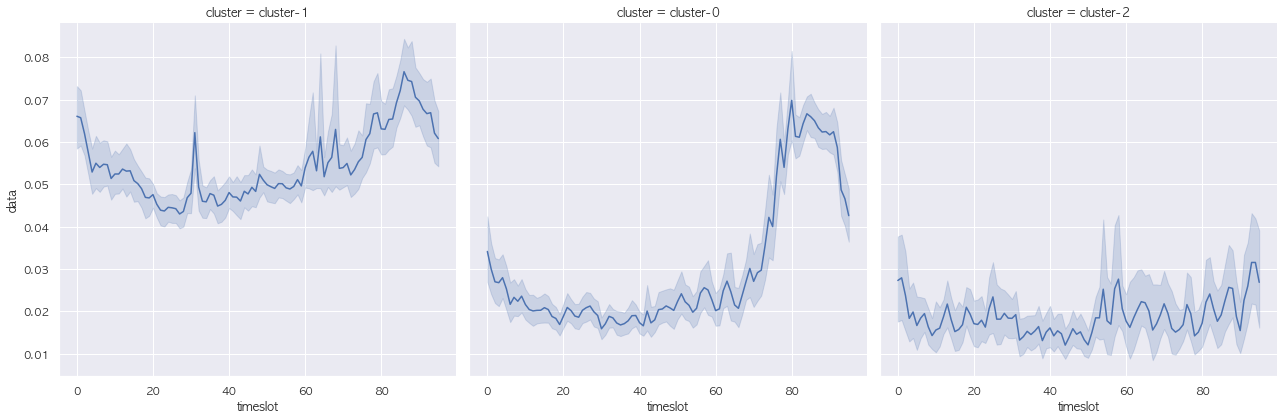

In [57]:
clusterMap = sns.FacetGrid(processingData, col = 'cluster', col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data")

In [65]:
best = pd.DataFrame(processingData.groupby('cluster').size().sort_values(ascending=False)).reset_index()['cluster'][0]
print(f'best is {best}')
cluster = processingData[processingData['cluster'] == best].groupby('timeslot').mean().reset_index()
cluster['uid'] = searchKeyword
cluster['season'] = '봄'
cluster

clusters = pd.concat([clusters, cluster], axis = 0)

best is cluster-0


,timeslot,data,uid,season
0,0,0.034154,아파트1-104-1206,봄
1,1,0.030026,아파트1-104-1206,봄
2,2,0.027000,아파트1-104-1206,봄
3,3,0.026795,아파트1-104-1206,봄
4,4,0.027974,아파트1-104-1206,봄
...,...,...,...,...
91,91,0.062410,아파트1-104-1206,봄
92,92,0.058692,아파트1-104-1206,봄
93,93,0.048692,아파트1-104-1206,봄
94,94,0.046590,아파트1-104-1206,봄


In [107]:
clusters = pd.DataFrame(columns=['uid', 'timeslot', 'season', 'data'])

In [75]:
clusters = pd.concat([clusters, cluster], axis = 0)

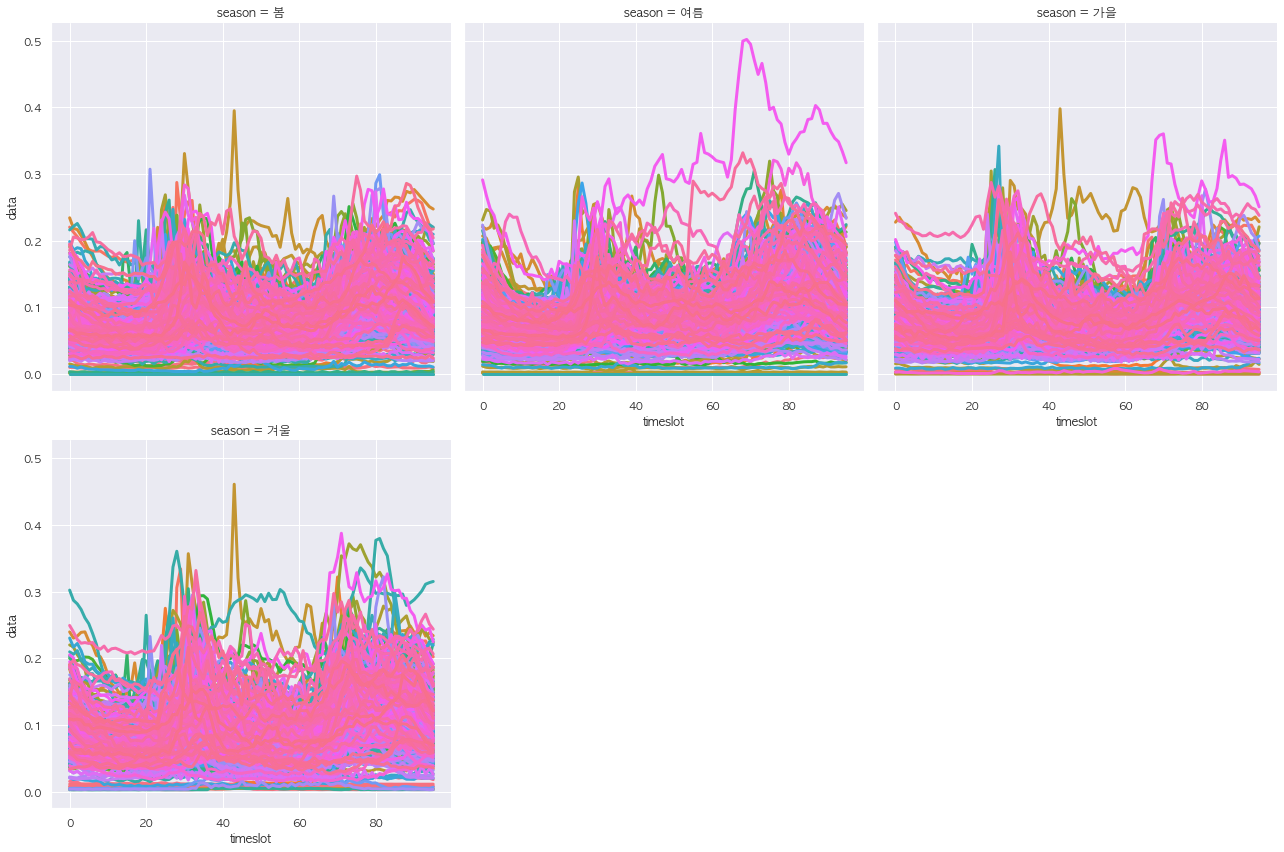

In [103]:
clusterMap = sns.FacetGrid(clusters, col="season",col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data", "uid", estimator=None, lw=3)